## Breve histórico de infrações de trânsito no Grande Recife

Análise realizade através dos dados adquiridos no Portal da Trânsparência do Grande Recife: http://dados.recife.pe.gov.br/id/dataset/registro-das-infracoes-de-transito

Esses dados fazem referência ao ano de **2017**

#### Através dessas informações, podemos responder algumas questões:

1 - Qual a maior forma de autuação no trânsito do Recife?

2 - Quais os locais que possuem os maiores números de infrações registrados?

3 - Qual o período do ano que ocorre o maior registro de infrações?

4 - Qual são as infrações mais cometidas?

In [1]:
#Importar bibliotecas
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [39]:
#Predefinindo os tipos
tipos = {'datainfracao':np.object,'horainfracao':np.object,'dataimplatacao':np.object,'agenteequipamento':np.object,'infracao':np.int64,'descricaoinfracao':np.object,'amparolegal':np.object,'localcometimento':np.object}

In [3]:
#Dataset
df = pd.read_csv('dataset.csv', delimiter=';', dtype=tipos)
#Ajustando coluna de agente/equipament
df.agenteequipamento = df.agenteequipamento.replace('8','AUTOS NO TALÃO ELETRÔNICO')
df.agenteequipamento = df.agenteequipamento.replace('3','LOMBADA ELETRÔNICA')
df.agenteequipamento = df.agenteequipamento.replace('5','FOTOSENSOR')
df.agenteequipamento = df.agenteequipamento.replace('9','FAIXA AZUL')
df.agenteequipamento = df.agenteequipamento.replace('7','ZONA AZUL TALÃO ELETRÔNICO')
#Continuação dos ajustes da coluna de agente/equipament
df.agenteequipamento = df.agenteequipamento.replace('Código 8 - AUTOS NO TALÃO ELETRÔNICO','AUTOS NO TALÃO ELETRÔNICO')
df.agenteequipamento = df.agenteequipamento.replace('Código 3 - LOMBADA ELETRÔNICA','LOMBADA ELETRÔNICA')
df.agenteequipamento = df.agenteequipamento.replace('Código 5 - FOTOSENSOR','FOTOSENSOR')
df.agenteequipamento = df.agenteequipamento.replace('Código 9 - FAIXA AZUL','FAIXA AZUL')
df.agenteequipamento = df.agenteequipamento.replace('Código 7 - ZONA AZUL TALÃO ELETRÔNICO','ZONA AZUL TALÃO ELETRÔNICO')
df.agenteequipamento = df.agenteequipamento.replace('225310','DESCONHECIDO')


In [40]:
#Apresentação do modelo
df.sort_values(by=['datainfracao','horainfracao']).head()

,datainfracao,horainfracao,dataimplantacao,agenteequipamento,infracao,descricaoinfracao,amparolegal,localcometimento
1277,2017-01-01,00:00:20,2017-01-05,AUTOS NO TALÃO ELETRÔNICO,5452,Estacionar o veículo no passeio.,"Art. 181, Inc. VIII","AVENIDA CONSELHEIRO AGUIAR, EM FRENTE AO N. 4..."
650,2017-01-01,00:01:39,2017-01-05,AUTOS NO TALÃO ELETRÔNICO,7048,"Conduzir motocicleta, motoneta e ciclomotor tr...","Art. 244, Inc. II","AVENIDA BOA VIAGEM, EM FRENTE AO N. 4000"
274,2017-01-01,00:01:47,2017-01-05,AUTOS NO TALÃO ELETRÔNICO,5274,Utilizar veículo para demonstrar/exibir manobr...,Art. 175,"RUA FELIX DE BRITO E MELO, EM FRENTE AO N. 143"
1634,2017-01-01,00:02:50,2017-01-05,AUTOS NO TALÃO ELETRÔNICO,5452,Estacionar o veículo no passeio.,"Art. 181, Inc. VIII","AVENIDA CONSELHEIRO AGUIAR, LADO OPOSTO AO BA..."
1086,2017-01-01,00:08:53,2017-01-05,AUTOS NO TALÃO ELETRÔNICO,7340,Dirigir o veículo usando calçado que não se fi...,"Art. 252, Inc. IV","RUA RIBEIRO DE BRITO, CRUZAMENTO DOS NAVEGANTES"


In [41]:
#Tratando dados date
df.dataimplantacao = pd.to_datetime(df.dataimplantacao)
df.datainfracao = pd.to_datetime(df.datainfracao)

## Início das análises

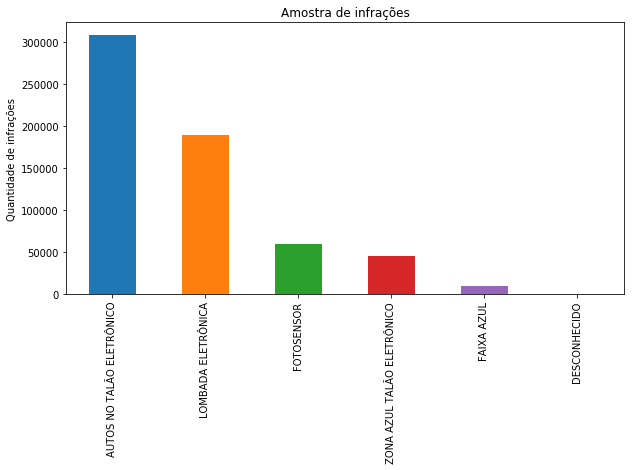

In [43]:
#Plot gráfico em barra para análise de infrações
infracoes = df['agenteequipamento'].value_counts()
infracoes.plot(kind='bar', figsize=(10,5))
plt.ylabel('Quantidade de infrações')
plt.title('Amostra de infrações')
plt.show()

Analisando o gráfico acima podemos notar que a forma mais eficiente de autuação hoje é através dos "AUTOS NO TALÃO ELETRÔNICO". O modelo deixa nítido a diferença gritante entre as demais formas de se autuar infratores.

In [7]:
contagem = df['localcometimento'].value_counts().head(8)

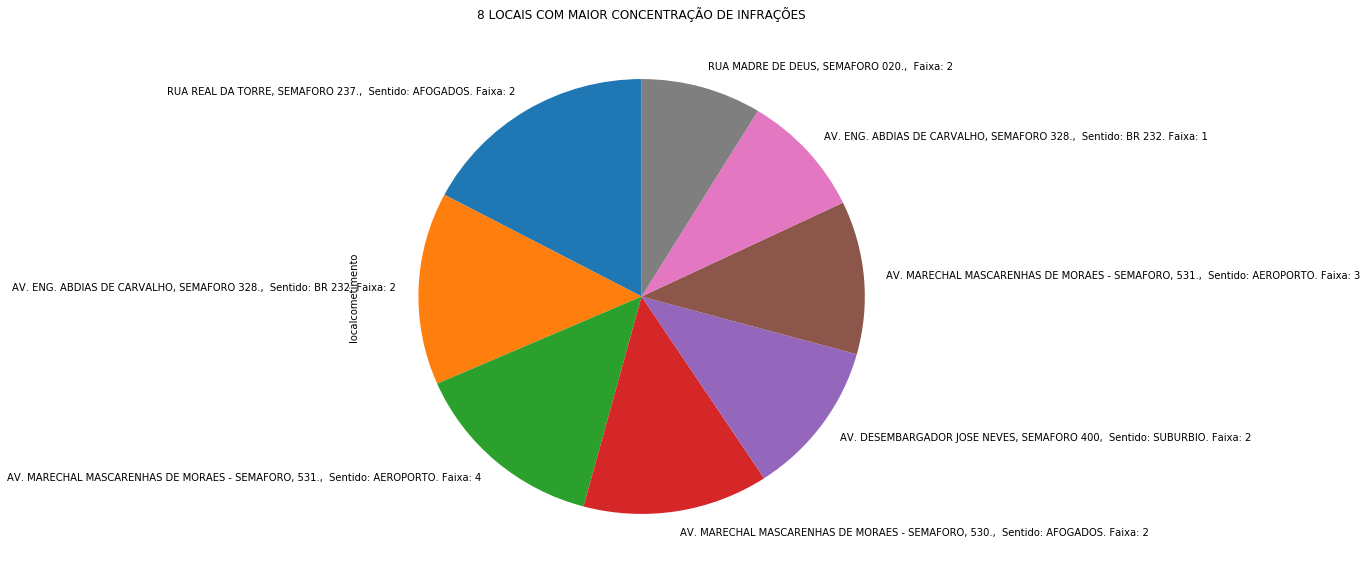

In [8]:
plt.figure(figsize=(10,10))
contagem.plot(kind='pie', title='8 LOCAIS COM MAIOR CONCENTRAÇÃO DE INFRAÇÕES', startangle=90)
plt.show()

O gráfico assima demonstra os pontos mais vulneráveis à infrações. Com ele podemos identificar mais rapidamente o motivo do qual essas infrações ocorrem com tanta frequência nesses locais.

In [9]:
piormes = df['datainfracao'].value_counts()

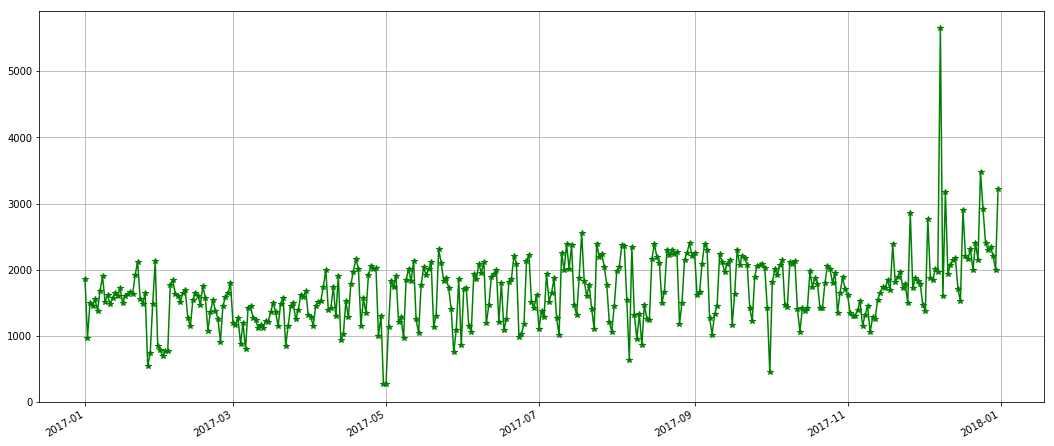

In [10]:
plt.figure(figsize=(18,8))
piormes.plot(kind='line', color='green', style='*-', grid=True)
plt.show()

Um dos pontos mais importantes da análise está aqui. Não se pode deixar de notar a subida alarmante das infrações no período de novembro à dezembro. Esse aumento pode se dar devido ao fato de ser o período de férias, ou o aumento da fiscalização nesse tempo de festas.

In [11]:
motivo = df['descricaoinfracao'].value_counts().head(8)

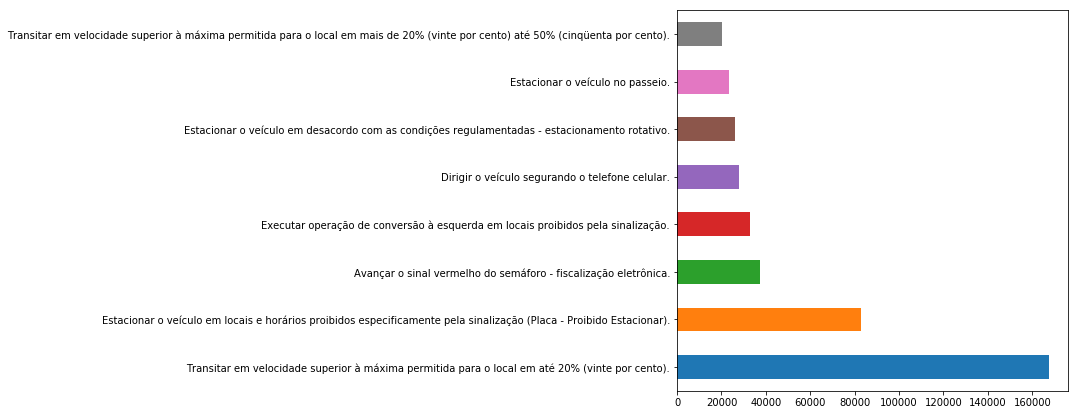

In [38]:
plt.figure(figsize=(7,7))
motivo.plot(kind='barh')
plt.show()

O gráfico acima demonstra as infrações mais cometidas pelos motoridas no Recife. É fácil notar que o excesso de velocidade é a principal causa, tendo em vista que só ela é mais que o dobro da segunda posição de infrações.